# LINEAR REGRESSION - n Variable

**Model: **
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

**Loss function: **
$$ \mathcal{L} (a) = \frac{1}{2m} \sum ^{m} _{i=1} (\hat{y} - y)^{2} $$

**Loss function derivative (gradient, slope): **
$$ \mathcal{L}' (w_1) = \frac{\partial \mathcal{L}}{\partial w_1} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_1 $$ 
$$ \mathcal{L}' (w_2) = \frac{\partial \mathcal{L}}{\partial w_2} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_2 $$ 
$$ ... $$
$$ \mathcal{L}' (w_n) = \frac{\partial \mathcal{L}}{\partial w_n} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) x_n $$ 
$$ \mathcal{L}' (b) = \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{y} - y) $$

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Implement with for-loop**

In [0]:
class model_1():
    def __init__(self,
                X_train,
                Y_train,
                num_step = 10000,
                lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    # Initialize weight and bias
    def initialize(self):
        self.W = [0 for _ in range(len(self.X_train[0]))]
        self.b = 0

    # Prediction of 1 data point
    def predict(self, x):
        y_hat = 0;
        for i in range(len(self.W)):
            y_hat += self.W[i] * x[i]

        y_hat += self.b
        return y_hat

    # Gradient of 1 data point
    def grad(self,x, y):
        dW = []
        db = 0
        y_hat = self.predict(x)
        
        for i in range(len(self.W)):
            dW.append((y_hat - y) * x[i])

        db = (y_hat - y)

        return {"dW":dW, "db" : db}

    # Gradient of all data point
    def grads(self):
        dW = [0 for _ in range(len(self.W))]
        db = 0
        m = len(self.Y_train)

        for i in range(m):
            x = self.X_train[i]
            y = self.Y_train[i]
            gradient = self.grad(x,y)
            for j in range(len(gradient["dW"])):
                dW[j] += gradient["dW"][j]/m
            db += gradient["db"]/m

        return {"dW":dW, "db" : db}

    # Calculate loss with respect to W and b
    def loss(self):
        total = 0
        m = len(self.Y_train)
        for i in range(m):
            x = self.X_train[i]
            y = self.Y_train[i]
            y_hat = self.predict(x)
            total = total + (y_hat - y)**2
        return total* 1 / (2*m)

    def train(self):
        self.initialize()
        for i in range(self.num_step):
            gradient = self.grads()
            for j in range(len(self.W)):
                self.W[j] = self.W[j] - self.lr * gradient["dW"][j]

            self.b = self.b - self.lr * gradient["db"]

            if i%500==0:
                print("At step " + str(i) + " " + str(self.loss()))

        print("W :" + str(self.W))
        print("b :" + str(self.b))

In [0]:
def genData_model_1():
    x_train = []
    y_train = []
    W = [2]
    b = 10
    m = 1000
    for i in range(m):
        x = []
        y = 0

        for j in range(len(W)):
            xj = random.randint(0, 1)
            y += xj * W[j]
            x.append(xj)

        y += b
        x_train.append(x)
        y_train.append(y)
    return x_train, y_train

In [5]:
X_1,Y_1 = genData_model_1()
model = model_1(X_train = X_1, Y_train = Y_1, num_step = 10000, lr = 0.003)
model.train()

At step 0 26.185334432
At step 500 1.07230108337
At step 1000 0.354621372406
At step 1500 0.19696653261
At step 2000 0.111931462479
At step 2500 0.0636558815036
At step 3000 0.0362022451871
At step 3500 0.020588884568
At step 4000 0.0117092787058
At step 4500 0.0066592829482
At step 5000 0.00378725714021
At step 5500 0.00215388304681
At step 6000 0.0012249530485
At step 6500 0.000696653410801
At step 7000 0.000396199654652
At step 7500 0.00022532605728
At step 8000 0.0001281470882
At step 8500 7.28796146006e-05
At step 9000 4.14479821505e-05
At step 9500 2.35722325613e-05
W :[2.0100828361435394]
b :9.99359212666


**Implement with vectorize**

**Input:** 

Training set contain m data point which is represented by a matrix **X** with m row and each row is one data point with n features.

$$ x^1_1 \space \space \space x^1_2 \space \space \space x^1_3 \space \space \space ... \space \space \space x^1_n $$
$$ x^2_1 \space \space \space x^2_2 \space \space \space x^2_3 \space \space \space ... \space \space \space x^2_n $$
$$ x^3_1 \space \space \space x^3_2 \space \space \space x^3_3 \space \space \space ... \space \space \space x^3_n $$
$$ ... $$
$$ x^m_1 \space \space \space x^m_2 \space \space \space x^m_3 \space \space \space ... \space \space \space x^m_n $$


In [0]:
class model_2():
    
    def __init__(self,
                 X_train,
                 Y_train,
                 num_step = 10000,
                 lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    def initialize(self):
        self.W = np.random.rand(self.X_train.shape[1])
        self.b = 0
        
    # Prediction of datas point
    # X : matrix (m x n)
    # W : vector n dimension
    # b : scalar
    def predict(self,X):
        Y_hat = np.dot(X, self.W) + self.b
        return Y_hat

    # Gradient on data set
    # X : matrix (m x n)
    # Y : matrix (m x 1)
    # W : Vector n dimension
    # b : scalar
    def grad(self):
        m = self.Y_train.shape[0]
        Y_hat = self.predict(self.X_train)
        dW = np.dot((Y_hat - self.Y_train), self.X_train) / m
        db = np.sum(Y_hat - self.Y_train) / m    
        return {"dW":dW, "db" : db}

    def loss(self):
        m = self.Y_train.shape[0]
        Y_hat = self.predict(self.X_train) 
        return np.sum(np.square(Y_hat - self.Y_train)) / (2*m)

    def train(self):
        self.initialize()
        self.losses = []
        for i in range(self.num_step):
            gradient = self.grad()
            self.W = self.W - self.lr * gradient["dW"]
            self.b = self.b - self.lr * gradient["db"]
            self.losses.append(self.loss())

            if i%500==0:
                print("At step " + str(i) + " " + str(self.losses[-1]))

        print("W :" + str(self.W))
        print("b :" + str(self.b))

In [0]:
def genData_model_2():
    W = np.array([2])
    b = 10
    m = 1000
    X_train = np.random.rand(m,W.shape[0])
    Y_train = np.dot(X_train, W) + b
    return X_train, Y_train

In [2]:
X_2,Y_2 = genData_model_2()
model = model_2(X_train = X_2, Y_train = Y_2, num_step = 10000, lr = 0.003)
model.train()

NameError: ignored

## **Plot data to graph**

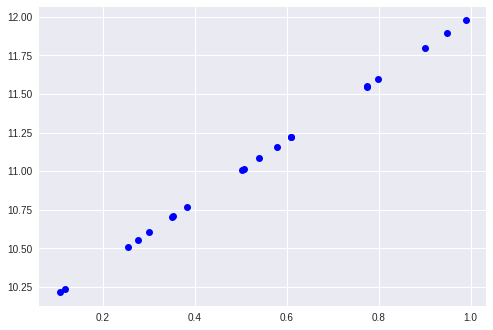

In [10]:
# Plot first 20 data point
plt.plot(X_2[:20,:],Y_2[:20], "bo")
plt.show()

## **Plot loss to graph - Learning Curve**

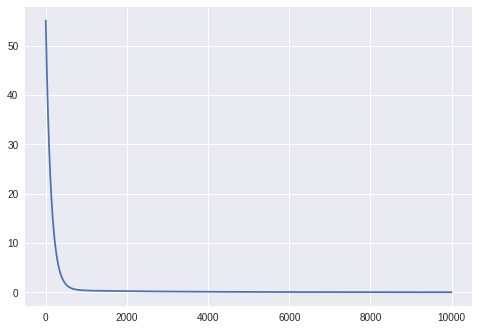

In [11]:
plt.plot(model.losses)
plt.show()